In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import matplotlib.ticker as mtick
import matplotlib as mpl

from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import *

In [7]:
data_nasabah = pd.read_csv('/content/drive/MyDrive/dataset/home-credit-default-risk/application_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/dataset/home-credit-default-risk/application_test.csv')

In [8]:
data_nasabah.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data_nasabah.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [10]:
data_nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


**Cek Data Duplikat**

In [11]:
data_nasabah.duplicated().sum()

np.int64(0)

**Variable Pemodelan**

In [12]:
data_nasabah.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [13]:
data_nasabah1=data_nasabah[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']]

data_test1=data_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']]

**Missing value**

In [14]:
missing_value = data_nasabah1.isnull().sum().reset_index()
missing_value.columns = ['feature','missing_value']
missing_value['percentage'] = round((missing_value['missing_value']/len(data_nasabah1))*100,2)
missing_value = missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
missing_value = missing_value[missing_value['percentage']>0]
missing_value

,feature,missing_value,percentage
0,NAME_TYPE_SUITE,1292,0.42
1,AMT_GOODS_PRICE,278,0.09


In [15]:
missing_value = data_test1.isnull().sum().reset_index()
missing_value.columns = ['feature','missing_value']
missing_value['percentage'] = round((missing_value['missing_value']/len(data_test1))*100,2)
missing_value = missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
missing_value = missing_value[missing_value['percentage']>0]
missing_value

,feature,missing_value,percentage
0,NAME_TYPE_SUITE,911,1.87
1,AMT_ANNUITY,24,0.05


**Handling Missing Value**

In [16]:
data_nasabahTrain = data_nasabah1.dropna()
data_nasabahTest = data_test1.dropna()

In [17]:
data_nasabahTrain.isnull().sum()

,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0


In [18]:
data_nasabahTest.isnull().sum()

,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0
NAME_TYPE_SUITE,0


In [19]:
print(len(data_nasabahTrain), len(data_nasabahTest))

306207 47809


In [20]:
data_nasabahTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306207 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      306207 non-null  int64  
 1   NAME_CONTRACT_TYPE          306207 non-null  object 
 2   CODE_GENDER                 306207 non-null  object 
 3   FLAG_OWN_CAR                306207 non-null  object 
 4   FLAG_OWN_REALTY             306207 non-null  object 
 5   CNT_CHILDREN                306207 non-null  int64  
 6   AMT_INCOME_TOTAL            306207 non-null  float64
 7   AMT_CREDIT                  306207 non-null  float64
 8   AMT_ANNUITY                 306207 non-null  float64
 9   AMT_GOODS_PRICE             306207 non-null  float64
 10  NAME_TYPE_SUITE             306207 non-null  object 
 11  NAME_INCOME_TYPE            306207 non-null  object 
 12  NAME_EDUCATION_TYPE         306207 non-null  object 
 13  NAME_FAMILY_STATUS 

In [21]:
print(data_nasabahTrain['TARGET'].unique(),'\n',
    data_nasabahTrain['NAME_CONTRACT_TYPE'].unique(),'\n',
      data_nasabahTrain['CODE_GENDER'].unique(),'\n',
      data_nasabahTrain['FLAG_OWN_CAR'].unique(),'\n',
      data_nasabahTrain['FLAG_OWN_REALTY'].unique(),'\n',
      data_nasabahTrain['NAME_TYPE_SUITE'].unique(),'\n',
      data_nasabahTrain['NAME_INCOME_TYPE'].unique(),'\n',
      data_nasabahTrain['NAME_EDUCATION_TYPE'].unique(),'\n',
      data_nasabahTrain['NAME_FAMILY_STATUS'].unique(),'\n',
      data_nasabahTrain['NAME_HOUSING_TYPE'].unique())

[1 0] 
 ['Cash loans' 'Revolving loans'] 
 ['M' 'F' 'XNA'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [22]:
print(data_nasabahTest['NAME_CONTRACT_TYPE'].unique(),'\n',
      data_nasabahTest['CODE_GENDER'].unique(),'\n',
      data_nasabahTest['FLAG_OWN_CAR'].unique(),'\n',
      data_nasabahTest['FLAG_OWN_REALTY'].unique(),'\n',
      data_nasabahTest['NAME_TYPE_SUITE'].unique(),'\n',
      data_nasabahTest['NAME_INCOME_TYPE'].unique(),'\n',
      data_nasabahTest['NAME_EDUCATION_TYPE'].unique(),'\n',
      data_nasabahTest['NAME_FAMILY_STATUS'].unique(),'\n',
      data_nasabahTest['NAME_HOUSING_TYPE'].unique())

['Cash loans' 'Revolving loans'] 
 ['F' 'M'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Group of people' 'Other_B'
 'Children' 'Other_A'] 
 ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed'] 
 ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [23]:
data_nasabahTrain.drop(data_nasabahTrain.index[data_nasabahTrain['CODE_GENDER']=='XNA'],inplace=True)
data_nasabahTrain.drop(data_nasabahTrain.index[data_nasabahTrain['NAME_INCOME_TYPE']=='Maternity leave'],inplace=True)

/tmp/ipython-input-2904410255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nasabahTrain.drop(data_nasabahTrain.index[data_nasabahTrain['CODE_GENDER']=='XNA'],inplace=True)
/tmp/ipython-input-2904410255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nasabahTrain.drop(data_nasabahTrain.index[data_nasabahTrain['NAME_INCOME_TYPE']=='Maternity leave'],inplace=True)


In [24]:
print(data_nasabahTrain['CODE_GENDER'].unique(),'\n',
     data_nasabahTrain['NAME_INCOME_TYPE'].unique())

['M' 'F'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman']


In [25]:
print(len(data_nasabahTrain), len(data_nasabahTest))

306198 47809


**Descriptive Static**

In [26]:
data_nasabahTrain.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,CNT_FAM_MEMBERS
count,306198.000000,306198.000000,3.061980e+05,3.061980e+05,306198.000000,3.061980e+05,306198.000000,306198.000000,306198.000000
mean,0.080840,0.417005,1.687827e+05,5.987985e+05,27122.049395,5.379456e+05,0.020865,-16040.713287,2.152774
std,0.272589,0.722101,2.375236e+05,4.019622e+05,14490.656610,3.689191e+05,0.013830,4362.868768,0.910582
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,-19685.000000,2.000000
50%,0.000000,0.000000,1.476000e+05,5.135310e+05,24930.000000,4.500000e+05,0.018850,-15756.000000,2.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12418.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,20.000000


array([[<Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>],
       [<Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>],
       [<Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>]], dtype=object)

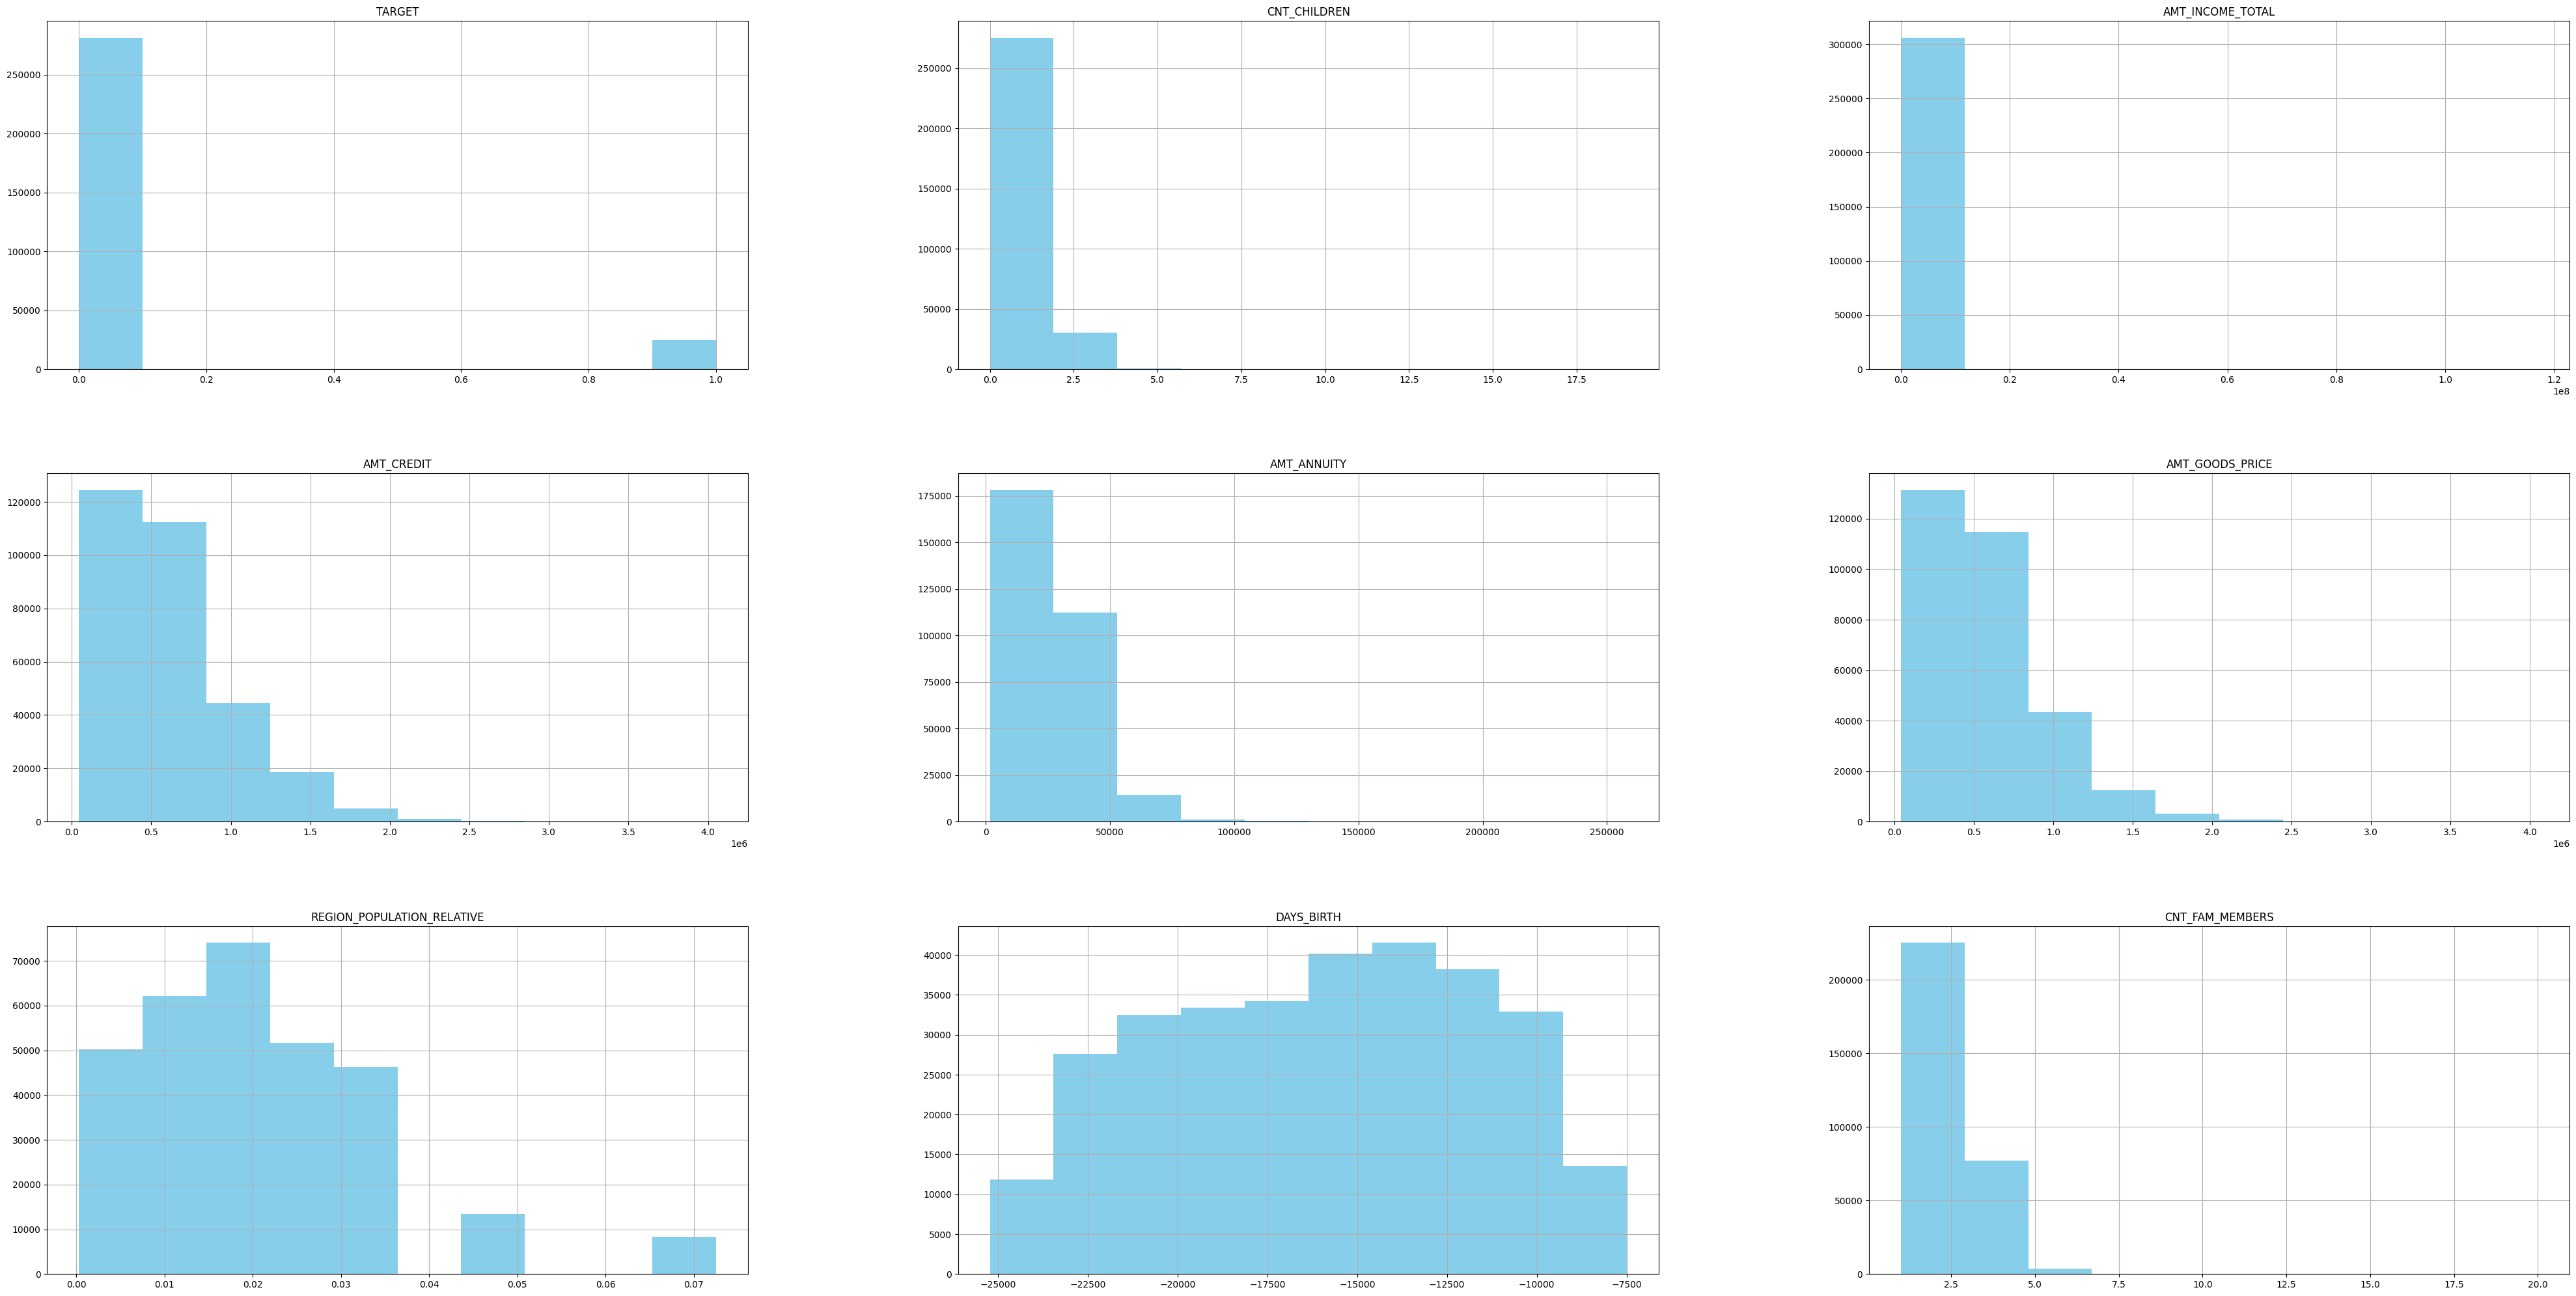

In [27]:
data_nasabahTrain.hist(figsize=(50,25),color='skyblue')

**Fitur Target**

1 = kesulitan dalam pembayaran
0 = Lunas tepat waktu

In [28]:
data_nasabahTrain.TARGET.value_counts()

,count
TARGET,
0,281445
1,24753


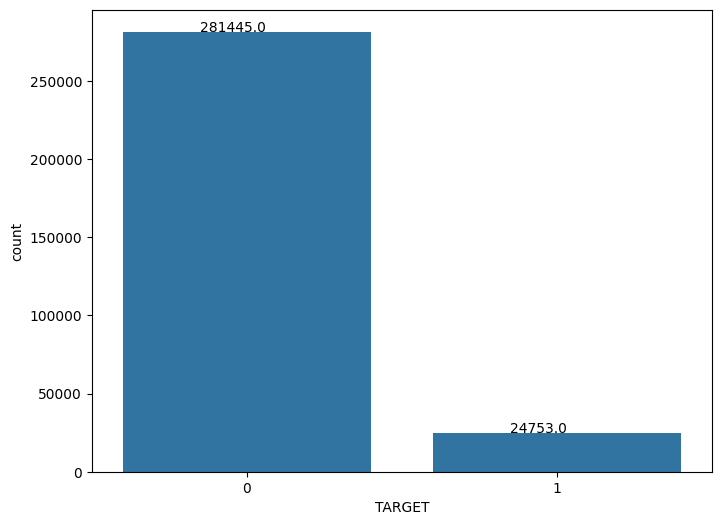

In [29]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data = data_nasabahTrain, x = 'TARGET', order=data_nasabahTrain['TARGET'].value_counts(ascending=False).index)

# Add annotations to the plot
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

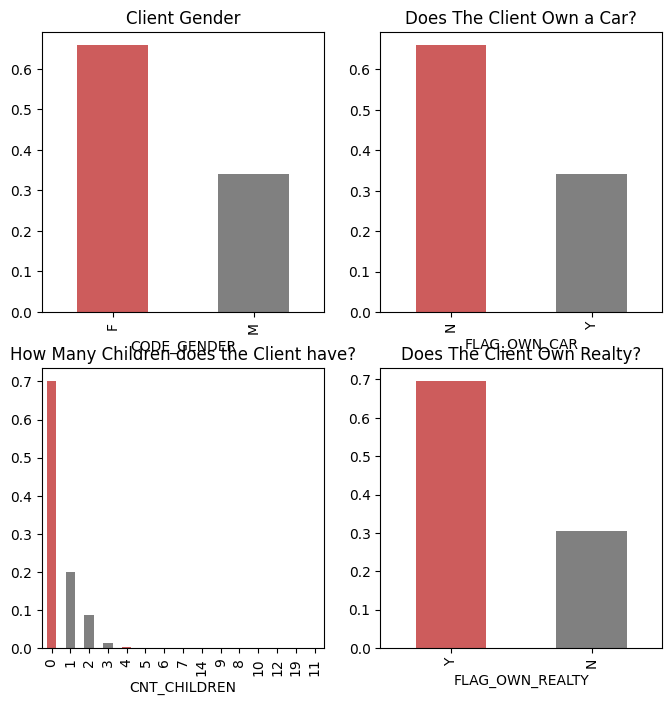

In [30]:
plt.figure(1)
plt.subplot(221)
data_nasabahTrain['CODE_GENDER'].value_counts(normalize=True).plot.bar(figsize=(8,8), title= 'Client Gender', color=['indianred','grey'])
plt.subplot(222)
data_nasabahTrain['FLAG_OWN_CAR'].value_counts(normalize=True).plot.bar(title= 'Does The Client Own a Car?', color=['indianred','grey'])
plt.subplot(223)
data_nasabahTrain['CNT_CHILDREN'].value_counts(normalize=True).plot.bar(title= 'How Many Children does the Client have?', color=['indianred','grey','grey','grey'])
plt.subplot(224)
data_nasabahTrain['FLAG_OWN_REALTY'].value_counts(normalize=True).plot.bar(figsize=(8,8), title= 'Does The Client Own Realty?', color=['indianred','grey'])

plt.show()

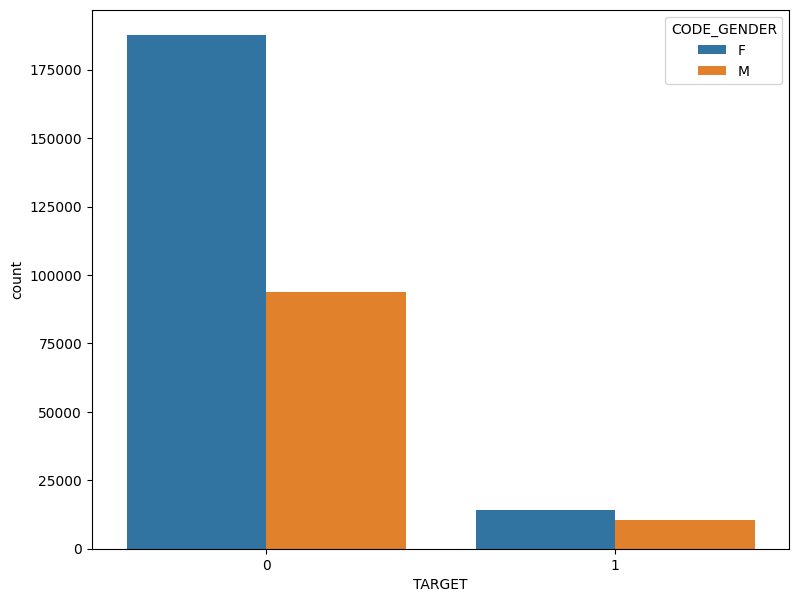

In [31]:
plt.figure(figsize=(9, 7))  # Set the desired figure size

sns.countplot(x=data_nasabahTrain['TARGET'], hue=data_nasabahTrain['CODE_GENDER'])

plt.show()

<Axes: xlabel='TARGET', ylabel='count'>

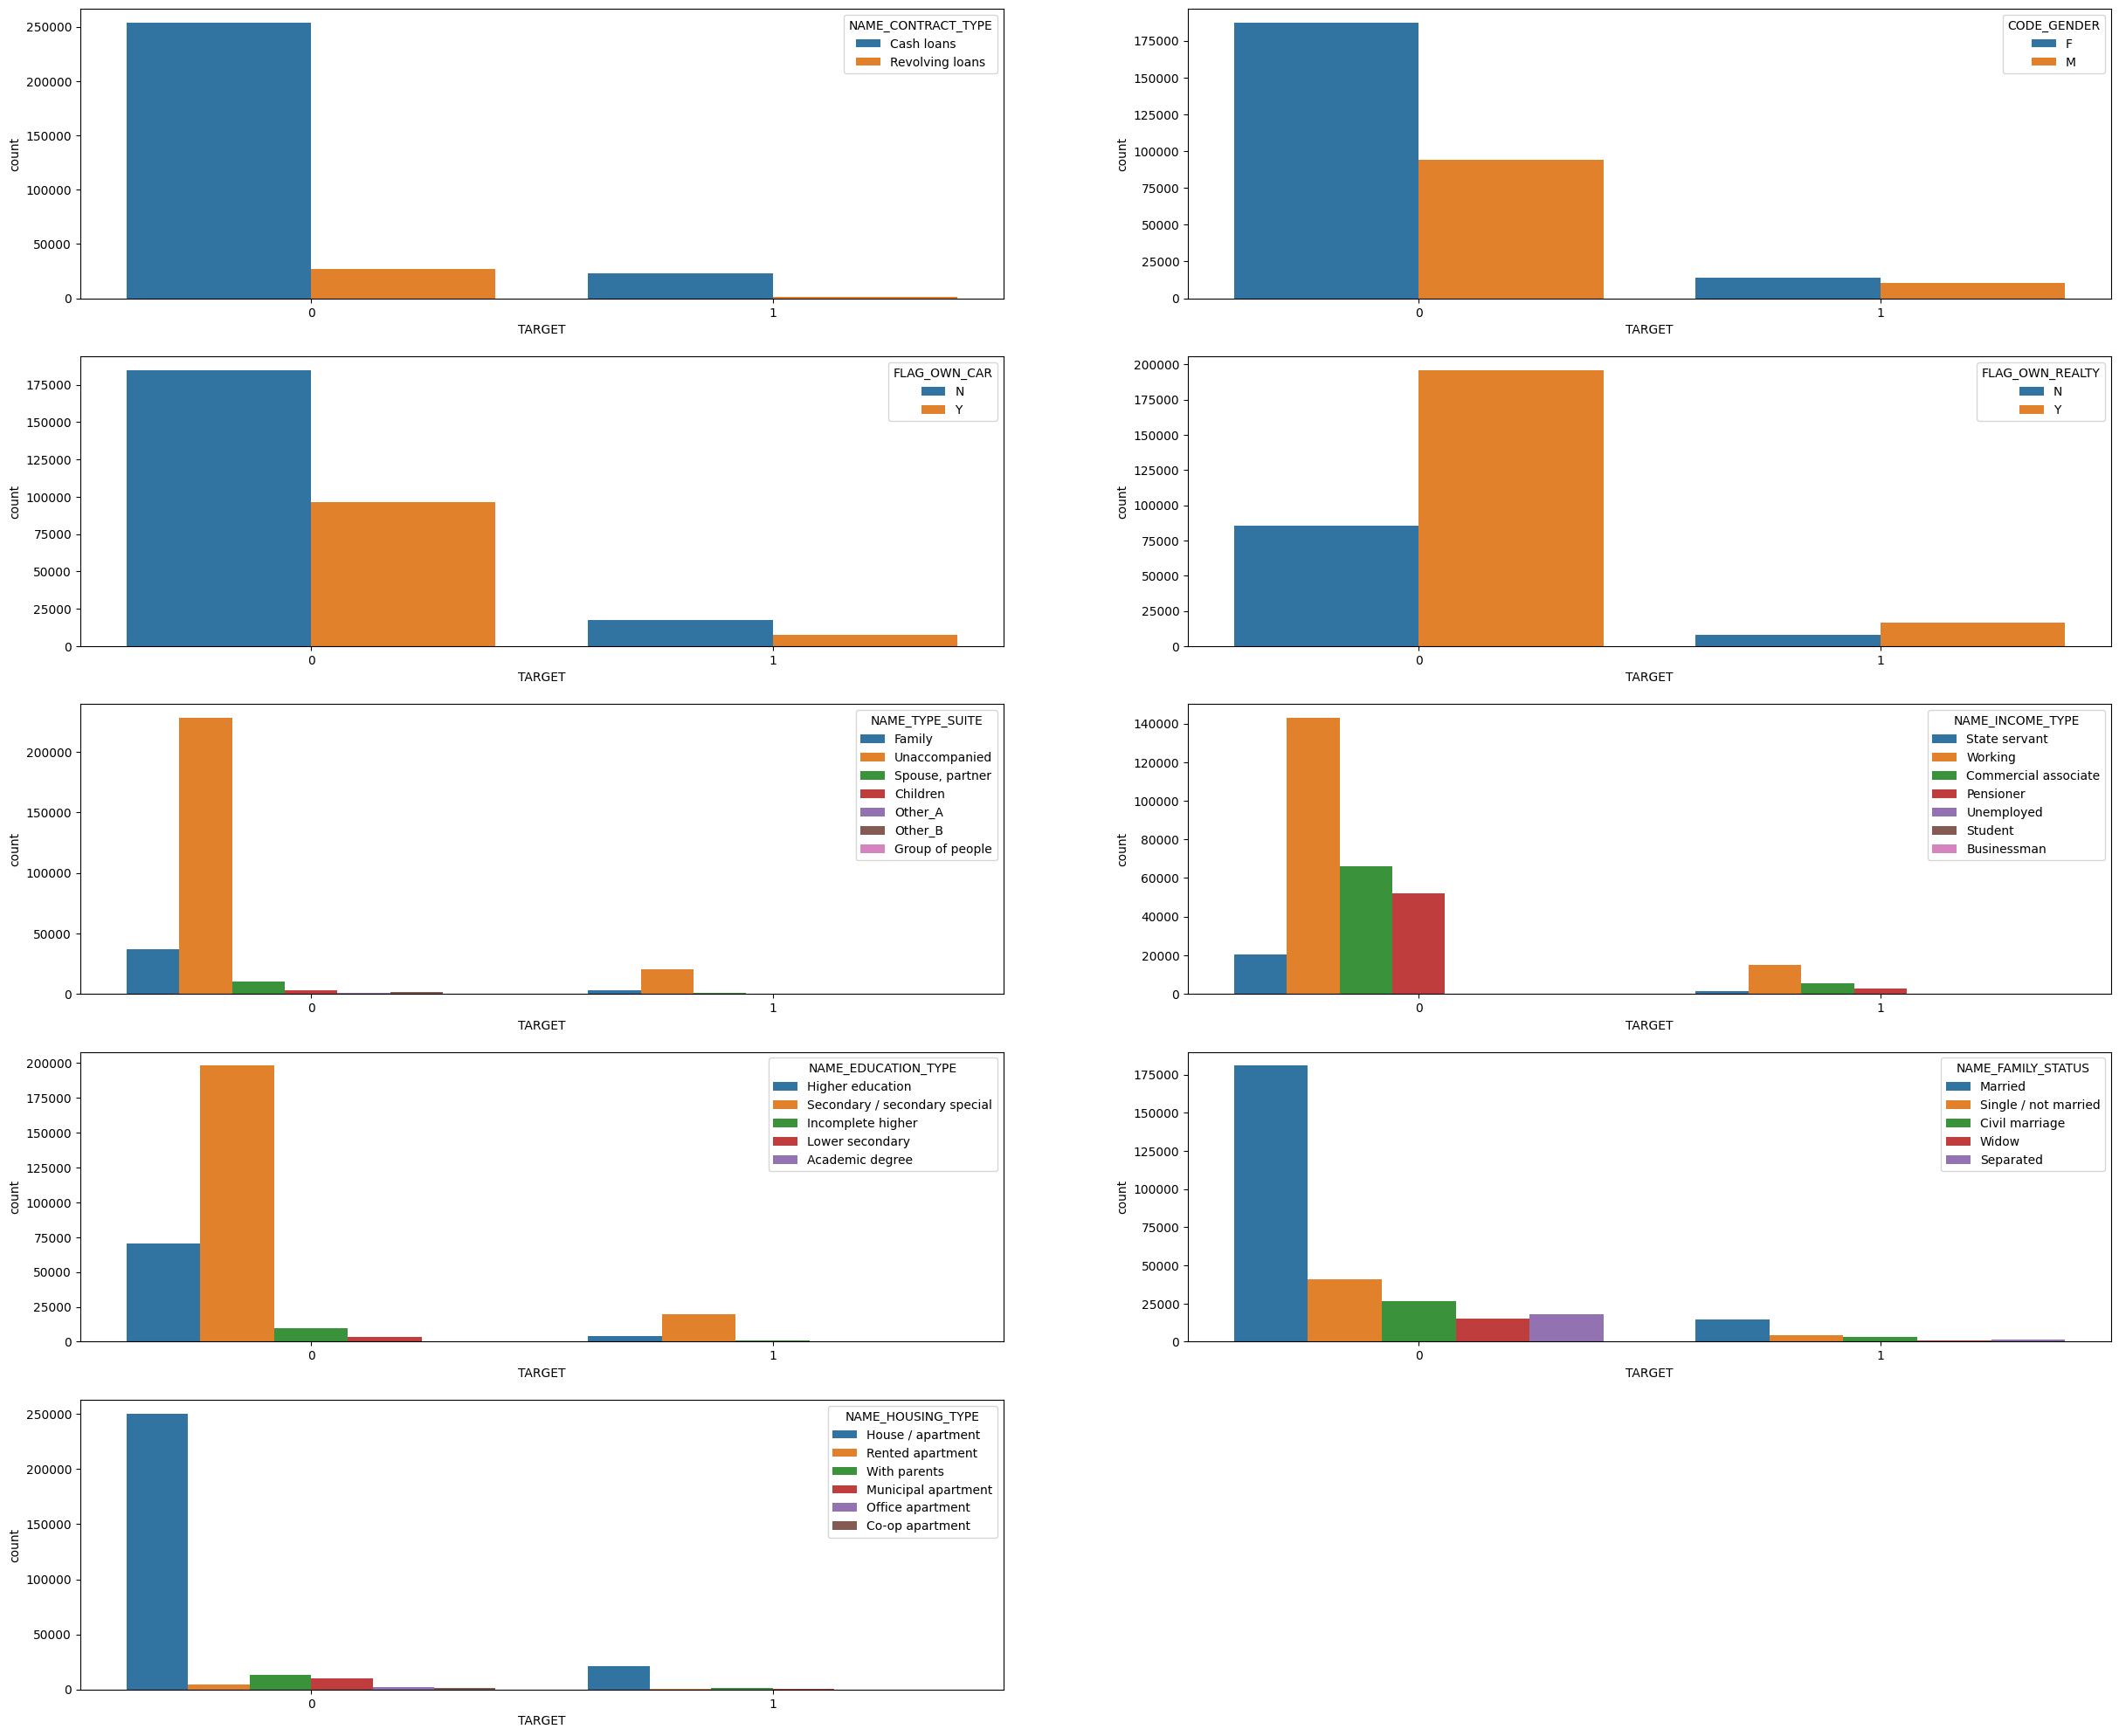

In [32]:
plt.figure(figsize=(30,25))

plt.subplot(5,2,1)
sns.countplot(x=data_nasabahTrain.TARGET,hue=data_nasabahTrain.NAME_CONTRACT_TYPE)

plt.subplot(5,2,2)
sns.countplot(x=data_nasabahTrain.TARGET,hue=data_nasabahTrain.CODE_GENDER)

plt.subplot(5,2,3)
sns.countplot(x=data_nasabahTrain.TARGET,hue=data_nasabahTrain.FLAG_OWN_CAR)

plt.subplot(5,2,4)
sns.countplot(x=data_nasabahTrain.TARGET,hue=data_nasabahTrain.FLAG_OWN_REALTY)

plt.subplot(5,2,5)
sns.countplot(x=data_nasabahTrain.TARGET,hue=data_nasabahTrain.NAME_TYPE_SUITE)

plt.subplot(5,2,6)
sns.countplot(x=data_nasabahTrain.TARGET,hue=data_nasabahTrain.NAME_INCOME_TYPE)

plt.subplot(5,2,7)
sns.countplot(x=data_nasabahTrain.TARGET,hue=data_nasabahTrain.NAME_EDUCATION_TYPE)

plt.subplot(5,2,8)
sns.countplot(x=data_nasabahTrain.TARGET,hue=data_nasabahTrain.NAME_FAMILY_STATUS)

plt.subplot(5,2,9)
sns.countplot(x=data_nasabahTrain.TARGET,hue=data_nasabahTrain.NAME_HOUSING_TYPE)

<Axes: >

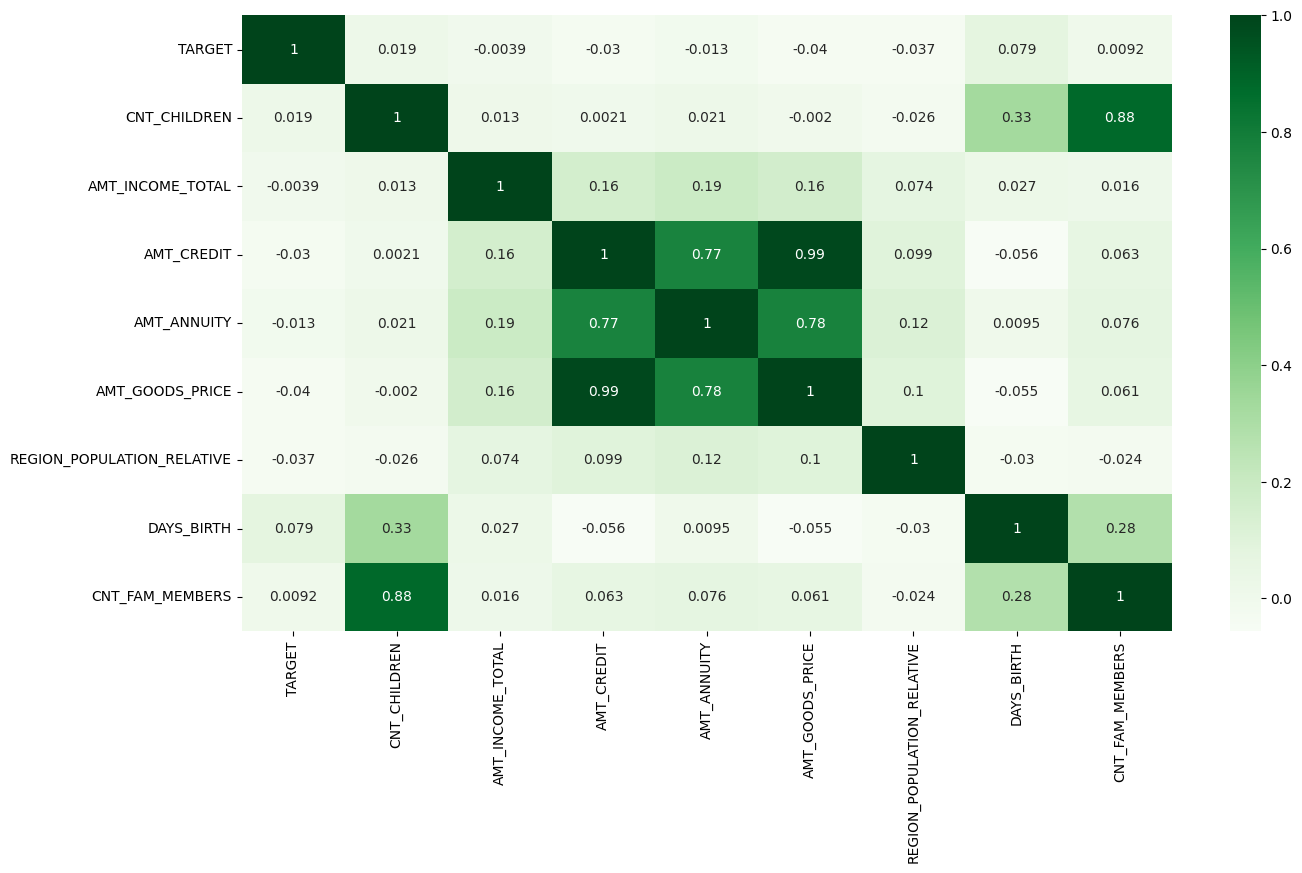

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15,8))
sns.heatmap(data_nasabahTrain.select_dtypes(include=np.number).corr(),cmap='Greens',annot=True)

**Pra-pemrosesan Data**


**Rekayasa Fitur**

In [34]:
AGE_TR=(data_nasabahTrain['DAYS_BIRTH']/-365).astype(int)
AGE_TS=(data_nasabahTest['DAYS_BIRTH']/-365).astype(int)

In [35]:
data_nasabahTrain=data_nasabahTrain.assign(AGE=AGE_TR).drop('DAYS_BIRTH',axis=1)
data_nasabahTrain.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1.0,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,2.0,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1.0,52


In [36]:
data_nasabahTest=data_nasabahTest.assign(AGE=AGE_TS).drop('DAYS_BIRTH',axis=1)
data_nasabahTest.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,2.0,52
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,2.0,49
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,4.0,38
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,3.0,35
5,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,2.0,50


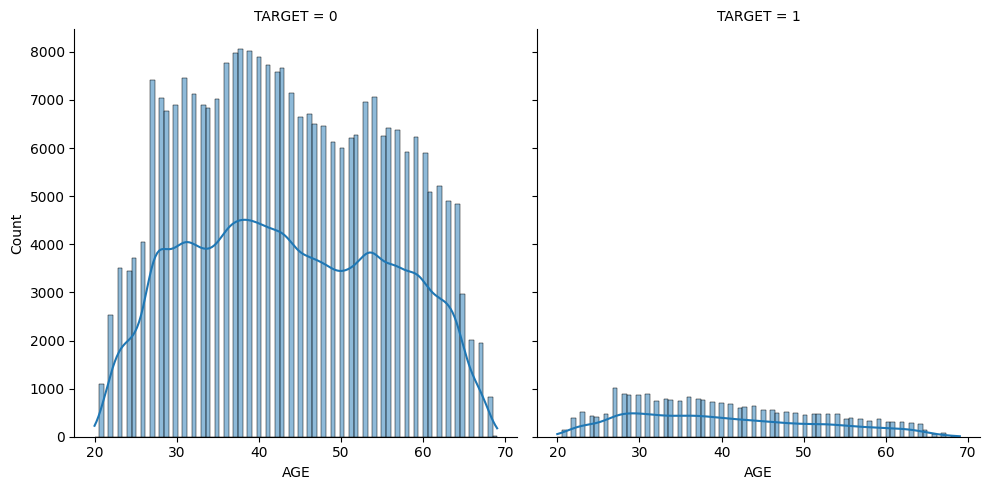

In [37]:
sns.displot(data=data_nasabahTrain, x="AGE", col='TARGET', kde=True)
plt.show()

In [38]:
data_age = data_nasabahTrain[['TARGET', 'AGE']]
data_age['AGE_GROUP'] = pd.cut(data_age['AGE'], bins = np.linspace(20, 70, num=6))
data_age = (data_age.groupby(['AGE_GROUP']).mean()).sort_values('TARGET')
data_age

/tmp/ipython-input-1751925168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age['AGE_GROUP'] = pd.cut(data_age['AGE'], bins = np.linspace(20, 70, num=6))
/tmp/ipython-input-1751925168.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_age = (data_age.groupby(['AGE_GROUP']).mean()).sort_values('TARGET')


,TARGET,AGE
AGE_GROUP,,
"(60.0, 70.0]",0.049304,63.468253
"(50.0, 60.0]",0.059313,55.403080
"(40.0, 50.0]",0.075530,45.245890
"(30.0, 40.0]",0.093087,35.610330
"(20.0, 30.0]",0.114349,26.691296


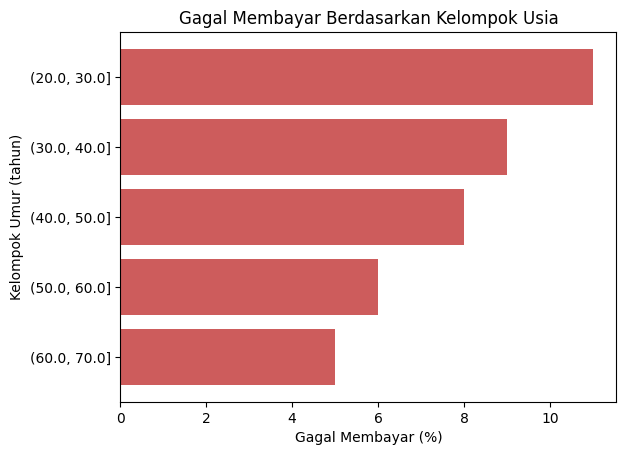

In [39]:
plt.barh(data_age.index.astype(str), round(100*data_age['TARGET']), color='indianred')

plt.ylabel('Kelompok Umur (tahun)')
plt.xlabel('Gagal Membayar (%)')
plt.title('Gagal Membayar Berdasarkan Kelompok Usia');
plt.show()

In [40]:
l = LabelEncoder()

categorical_cols_train = data_nasabahTrain.select_dtypes(include='object').columns
for q in categorical_cols_train:
    data_nasabahTrain[q] = l.fit_transform(data_nasabahTrain[q])
categorical_cols_test = data_nasabahTest.select_dtypes(include='object').columns

if len(categorical_cols_test) > 0:
    for q in categorical_cols_test:
        l = LabelEncoder()
        data_nasabahTest[q] = l.fit_transform(data_nasabahTest[q])

data_nasabahTest.head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,2.0,52
1,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,2.0,49
3,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,4.0,38


**Modelling**

Split Data

In [41]:
from sklearn.model_selection import train_test_split

X = data_nasabahTrain.drop(columns = ['TARGET'])
y = data_nasabahTrain['TARGET']

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, # 70% training and 30% test
                                                    random_state=109)

In [42]:
X_train.shape, y_train.shape

((214338, 17), (214338,))

In [43]:
y_train.value_counts()

,count
TARGET,
0,197056
1,17282


**Penggunaan SMOTE untuk penyeimbang dataset**

In [44]:
smt = SMOTE(sampling_strategy=0.5)
X_train,y_train = smt.fit_resample(X_train,y_train)

   Labels  TARGET
0       0  197056
1       1   98528


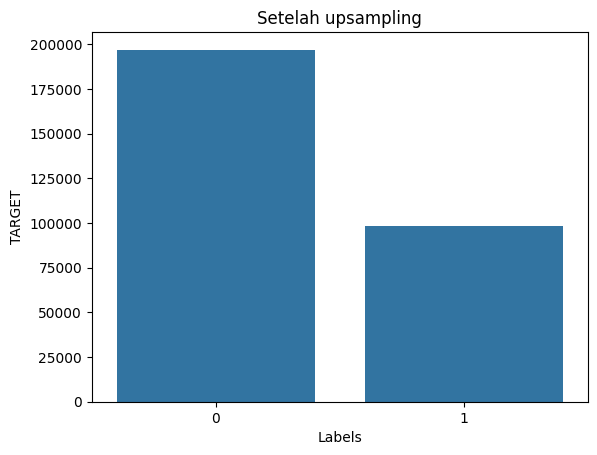

In [111]:
oversample_plot = y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','TARGET']
print(oversample_plot)
sns.barplot(x='Labels',y='TARGET',data=oversample_plot);
plt.title('Setelah upsampling');

**LOGISTIC REGRESSION**

In [52]:
clf3 = LogisticRegression(random_state=42)
param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

In [53]:
pipeline = Pipeline([('classifier', LogisticRegression())])

# Define the parameter grid with the solver and penalty options
param_grid = {
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1'],
}

# Perform the grid search
gs_lr = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
gs_lr.fit(X_train, y_train)

# Get the best parameters
best_params = gs_lr.best_params_
print(best_params)

{'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [54]:
print("Test Accuracy Score:",accuracy_score(gs_lr.predict(X_test), y_test))
print("Test Precision:", precision_score(gs_lr.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_lr.predict(X_test), y_test))

Test Accuracy Score: 0.8296538210320052
Test Precision: 0.16383348949270513
Test Recall: 0.1152


In [55]:
y_pred = gs_lr.predict(X_test)
lr_train_acc = accuracy_score(y_train, gs_lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Logistic Regression is : 0.7360817906246617
Test accuracy of Logistic Regression is : 0.8296538210320052
[[74988  9401]
 [ 6247  1224]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     84389
           1       0.12      0.16      0.14      7471

    accuracy                           0.83     91860
   macro avg       0.52      0.53      0.52     91860
weighted avg       0.86      0.83      0.84     91860



In [58]:
y_pred = gs_lr.predict(data_nasabahTest)
y_pred


array([0, 0, 0, ..., 0, 1, 0])

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

rf_train_acc = accuracy_score(y_train, model.predict(X_train))
rf_test_acc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.910842586544742

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     84389
           1       0.15      0.02      0.04      7471

    accuracy                           0.91     91860
   macro avg       0.53      0.51      0.49     91860
weighted avg       0.86      0.91      0.88     91860


Confusion Matrix:
 [[83518   871]
 [ 7319   152]]


In [65]:
y_pred1 = model.predict(data_nasabahTest)
y_pred1


array([0, 0, 0, ..., 0, 0, 0])

In [63]:
import pandas as pd

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")

print(f"Training accuracy of Random Forest is : {rf_train_acc}")
print(f"Test accuracy of Random Forest is : {rf_test_acc}")

Model = ['Logistic Regression', 'Random Forest']
Train_acc = [lr_train_acc, rf_train_acc]
Test_acc = [lr_test_acc, rf_test_acc]

comparison_df = pd.DataFrame({'Model': Model, 'Train Accuracy': Train_acc, 'Test Accuracy': Test_acc})
display(comparison_df)

Training accuracy of Logistic Regression is : 0.7360817906246617
Test accuracy of Logistic Regression is : 0.8296538210320052
Training accuracy of Random Forest is : 0.9999830843347407
Test accuracy of Random Forest is : 0.910842586544742


,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.736082,0.829654
1,Random Forest,0.999983,0.910843
